In [19]:
import codecs
import pandas as pd
from pyvi import ViTokenizer
from underthesea import word_tokenize

data_vnexpress = pd.read_csv(codecs.open('filtered_data/vnexpress.csv','r','utf-8'))
data_dantri = pd.read_csv(codecs.open('filtered_data/dantri.csv','r','utf-8'))


# data_vnexpress = data_vnexpress.replace(to_replace="(\._)",regex=True,value='')

In [20]:
data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\._)", regex=True,repl="")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\d*)", regex=True,repl="")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\s+[a-zA-Z]\s+)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.replace(pat="(\W)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.replace(pat=r"(\s+)", regex=True,repl=" ")

data_vnexpress.content = data_vnexpress.content.str.lower()

data_vnexpress.to_csv("train_data/vnexpress.csv")

In [21]:
data_dantri.content = data_dantri.content.str.replace(pat="(\._)", regex=True,repl="")

data_dantri.content = data_dantri.content.str.replace(pat="(\d*)", regex=True,repl="")

data_dantri.content = data_dantri.content.str.replace(pat="(\s+[a-zA-Z]\s+)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.replace(pat="(\W)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.replace(pat=r"(\s+)", regex=True,repl=" ")

data_dantri.content = data_dantri.content.str.lower()

data_dantri.to_csv("train_data/data_dantri.csv")

In [26]:
labels = [
('Chinh tri Xa hoi', 0),
('Cong Nghe', 1),
('Doi Song', 2),
('Du Lich', 3),
('Giai Tri', 4),
('Giao Duc', 5),
('Khoa hoc', 6),
('Kinh doanh', 7),
('Phap Luat ', 8),
('Suc Khoe', 9),
('The Gioi', 10),
('The Thao', 11),
('Xe', 12),
]

In [29]:
import pandas as pd
from model.svm_model import SVMModel
import codecs
from sklearn.model_selection import train_test_split  

data = pd.read_csv(
    codecs.open('train_data/data_dantri.csv', 'r', 'utf-8'))
data = data.append(pd.read_csv(
    codecs.open('train_data/vnexpress.csv', 'r', 'utf-8')))
for label, idx in labels:
    print('%s: %d' % (label,len(data[data.label == idx])))

X, y = data.content, data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = SVMModel()
clf = model.clf.fit(X_train,y_train)

Chinh tri Xa hoi: 3239
Cong Nghe: 2468
Doi Song: 2309
Du Lich: 2864
Giai Tri: 4088
Giao Duc: 4912
Khoa hoc: 1149
Kinh doanh: 6720
Phap Luat : 2984
Suc Khoe: 2656
The Gioi: 6073
The Thao: 6245
Xe: 1028


/home/ngochoang/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [30]:
y_pred = clf.predict(X_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[ 311    0    4   12    4   15    0  168   49    6   59    4    0]
 [   2  303    0    0   10    7    0  102    3    2   35    7    0]
 [   7    2   54   11   64   39    0  191    5   27   39    4    0]
 [   2    1    1  360   17    4    0   79    2    1  105    7    1]
 [   9    0    1   10  704   13    0   29    2   10   20   25    0]
 [   4    3    0    0   13  921    0   25    2    2   15    1    0]
 [   1    4    0    4    7    8    1   60    0   29   88    2    1]
 [  14    6    0    5    7    9    0 1288    5    5   44    1   15]
 [  20    0    0    0    4    7    0   63  498    3   20    1    4]
 [   6    1    0    0   15    7    0   37    2  470    8    9    0]
 [   0    0    2    8   17   11    0   44    5    1 1088   11    2]
 [   0    0    0    0    3    0    0    3    0    1    7 1223    0]
 [  12    0    0    0    0    4    0   87    0    0    7    1   96]]
              precision    recall  f1-score   support

         0.0       0.80      0.49      0.61       632
      

In [49]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax




Confusion matrix, without normalization
[[ 311    0    4   12    4   15    0  168   49    6   59    4    0]
 [   2  303    0    0   10    7    0  102    3    2   35    7    0]
 [   7    2   54   11   64   39    0  191    5   27   39    4    0]
 [   2    1    1  360   17    4    0   79    2    1  105    7    1]
 [   9    0    1   10  704   13    0   29    2   10   20   25    0]
 [   4    3    0    0   13  921    0   25    2    2   15    1    0]
 [   1    4    0    4    7    8    1   60    0   29   88    2    1]
 [  14    6    0    5    7    9    0 1288    5    5   44    1   15]
 [  20    0    0    0    4    7    0   63  498    3   20    1    4]
 [   6    1    0    0   15    7    0   37    2  470    8    9    0]
 [   0    0    2    8   17   11    0   44    5    1 1088   11    2]
 [   0    0    0    0    3    0    0    3    0    1    7 1223    0]
 [  12    0    0    0    0    4    0   87    0    0    7    1   96]]


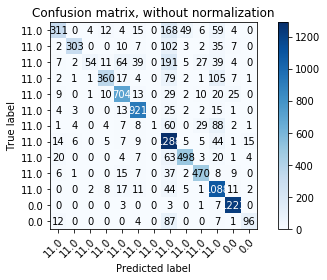

In [50]:
np.set_printoptions(precision=5)
class_names = data_dantri.label

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()